In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ml_coursera.regression.linear import LinearRegression

### Problem #1

In [17]:
df = pd.read_csv("ex1data1.txt", header=None)
df.columns = ["population", "profit"]
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [30]:
reg = LinearRegression(reg_param=0)
scaler = StandardScaler()

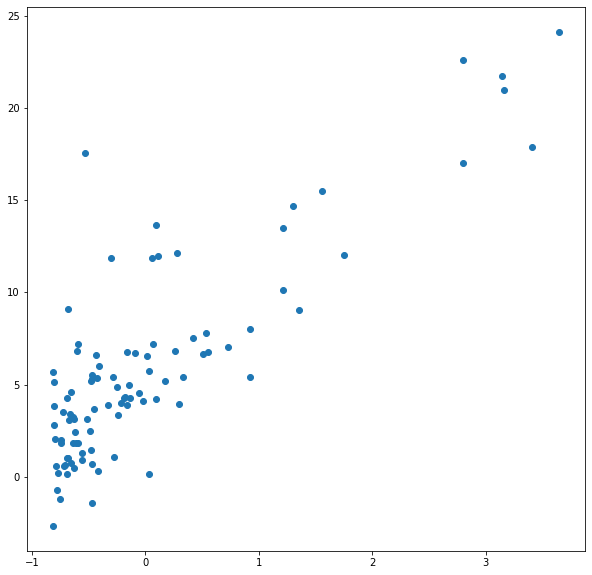

In [31]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data=df, x="population", y="profit")
plt.show()

In [32]:
df[["population"]] = scaler.fit_transform(df[["population"]])

x = df[["population"]].to_numpy()
y = df.profit.to_numpy()

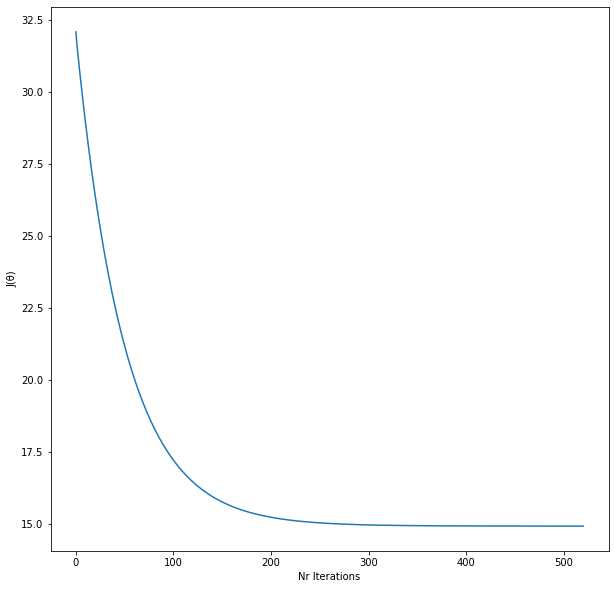

In [33]:
reg.fit(x, y)

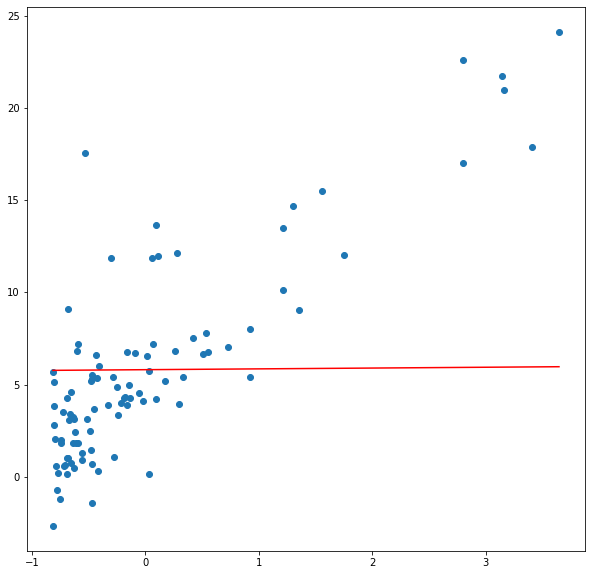

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data=df, x="population", y="profit")
x_lin = np.linspace(df['population'].min(), df['population'].max(), 2)
y_lin = reg.predict(np.reshape(x_lin, (-1, 1)))

plt.plot(x_lin, y_lin, color="r")

plt.show()

In [35]:
reg.score(x, y)

0.013391665560403943

### Problem #2

In [9]:
df = pd.read_csv("ex1data2.txt", header=None)
df.columns = ["area", "bedroom", "price"]
df.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
reg = LinearRegression()
scaler = StandardScaler()

In [11]:
df[["area", "bedroom"]] = scaler.fit_transform(df[["area", "bedroom"]])

x = df[["area", "bedroom"]].to_numpy()
y = df.price.to_numpy()

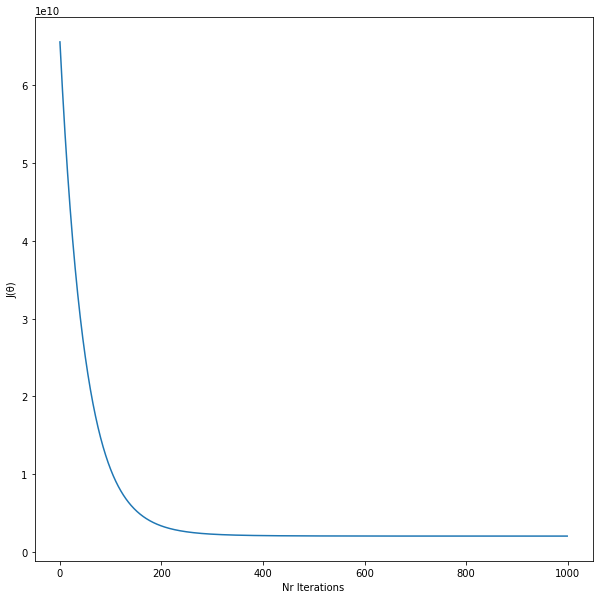

In [12]:
reg.fit(x, y)

In [13]:
if x.shape[1] == 1:
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(data=df, x="area", y="price")
    x_lin = np.linspace(5, 25, 100)
    y_lin = reg.predict(np.reshape(x_lin, (-1, 1)))

    plt.plot(x_lin, y_lin, color="r")

    plt.show()

In [14]:
reg.score(x, y)

0.7329164083047068